In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits



In [411]:

hdul = fits.open('kplr010287248-20160128150956_dvt.fits')
#convert to native byte order

# with fits.open('kplr010287248-20160128150956_dvt.fits') as data:
#     df = pd.DataFrame(data[0].data)
#hdul.info()
df = pd.DataFrame(hdul[1].data)
#print(len(data.field(0)))
#plt.plot(data.field(0)[0:20000],data.field(6)[0:20000])
#size of data
# import math
# i=0
# j=0
# usableData = []
# for i in range(len(data.field(0))):
#     if math.isnan(data.field(6)[i])==False:
#         if math.isnan(data.field(7)[i])==False:
#             usableData.append(data[i])
    
# usableData = np.array(usableData)

Index(['TIME', 'TIMECORR', 'CADENCENO', 'PHASE', 'LC_INIT', 'LC_INIT_ERR',
       'LC_WHITE', 'LC_DETREND', 'MODEL_INIT', 'MODEL_WHITE'],
      dtype='object')


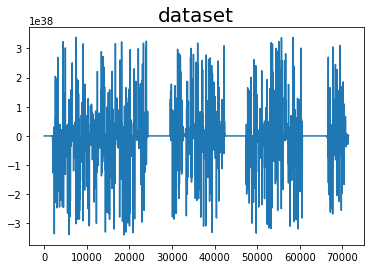

In [413]:
sys_byteorder = ('>', '<')[sys.byteorder == 'little']
hdul[1].data = hdul[1].data.byteswap().newbyteorder(sys_byteorder)
df = pd.DataFrame(hdul[1].data)
df = df.dropna()
print(df.columns)
plt.title('dataset', size=20)
plt.plot(df["LC_INIT"])
plt.show()

df = df[66000:len(df)]

In [417]:
print(df["LC_INIT"])
plt.title('dataset', size=20)
plt.plot(df)
plt.show()

print(df.mean())

KeyError: 'LC_INIT'

In [314]:
sizeTest = len(usableData) * 0.8
sizeTest = int(sizeTest)

#split data into training and testing
trainData = usableData[0:sizeTest]
testData = usableData[sizeTest:len(usableData)]


In [311]:
import pmdarima as pm

ARIMA_model = pm.auto_arima(trainData[:,4], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      d=None,# let model determine 'd'
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

/Users/zekarim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/zekarim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/zekarim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/zekarim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/zekarim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roo

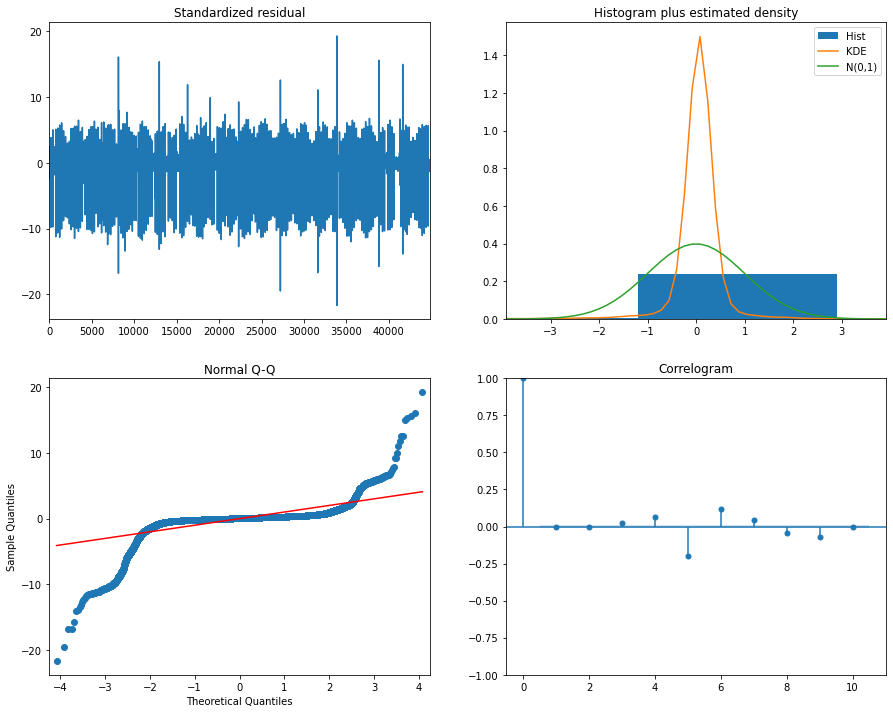

In [368]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

## SARIMA Model

/Users/zekarim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/zekarim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/zekarim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/zekarim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/zekarim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roo

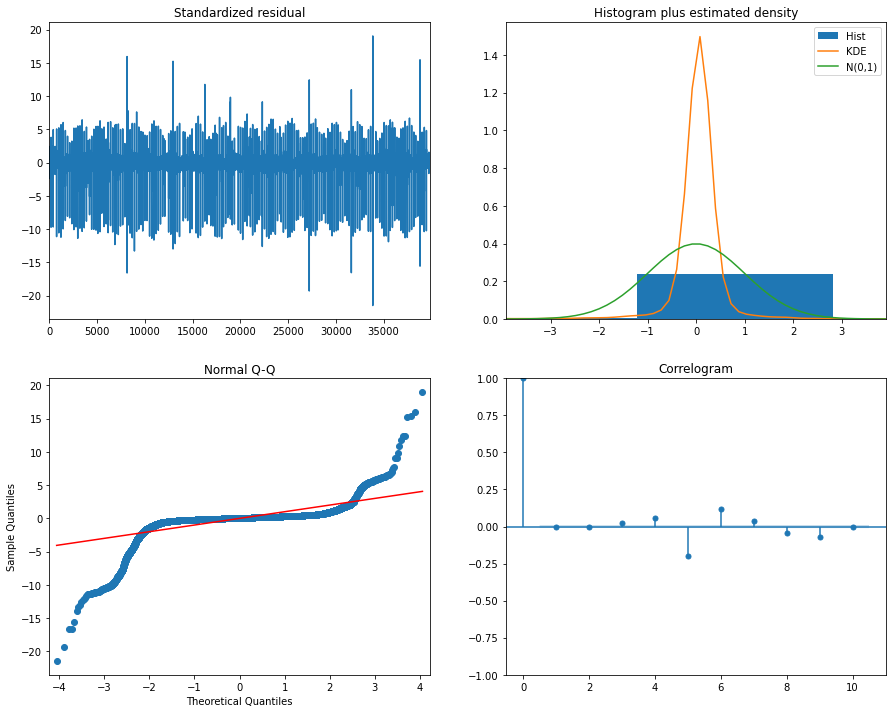

In [369]:
#SARIMA Model

SARIMA_model = pm.auto_arima(trainData[:,4],
                        start_p=1,
                        start_q=1,
                        max_p=3,
                        max_q=3,
                        start_P=0,
                        seasonal=True,
                        d=None,
                        D=1,
                        trace=False,
                        error_action='warn',
                        suppress_warnings=True,
                        stepwise=True)


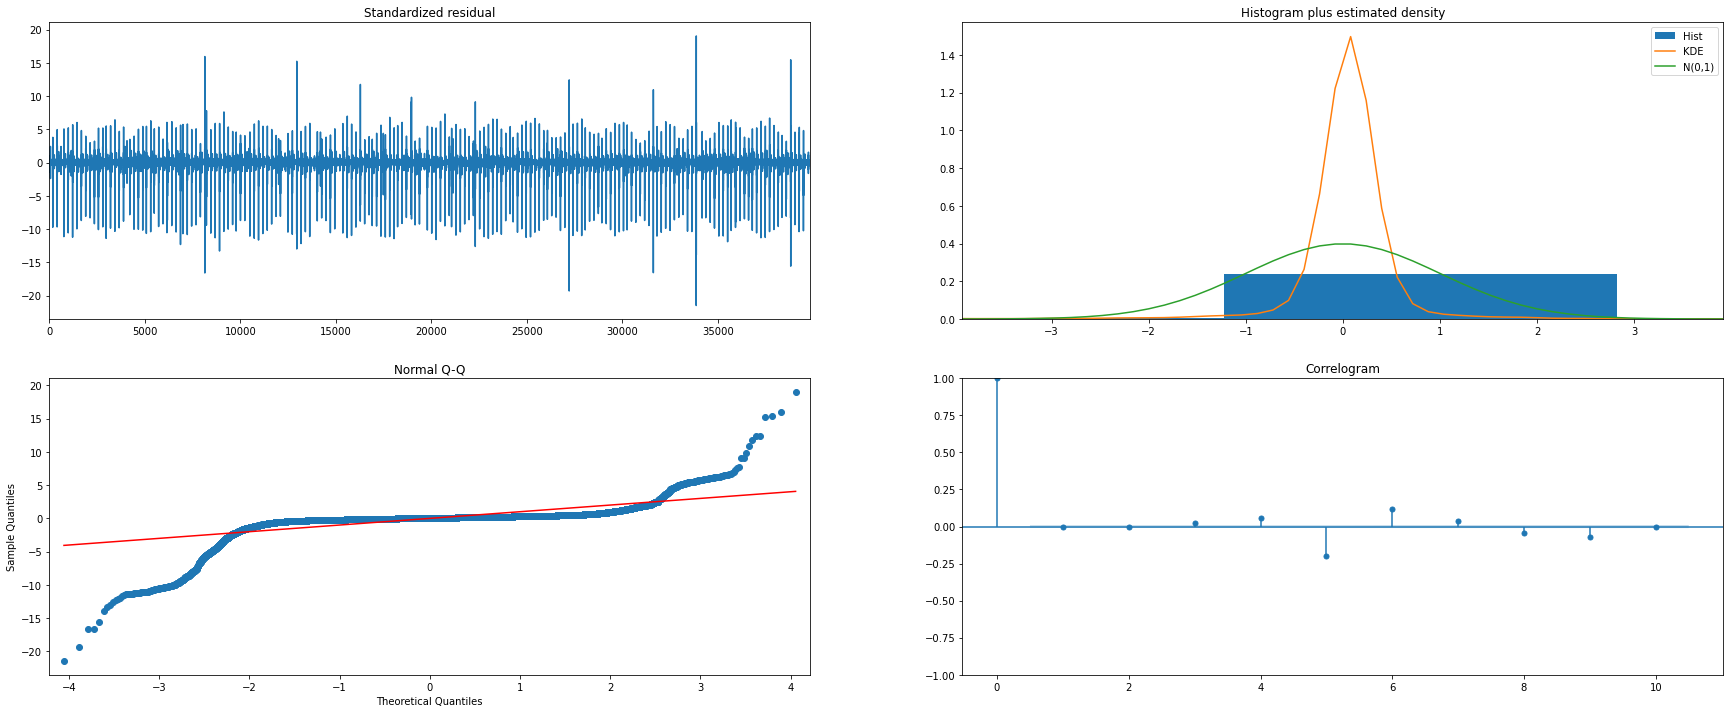

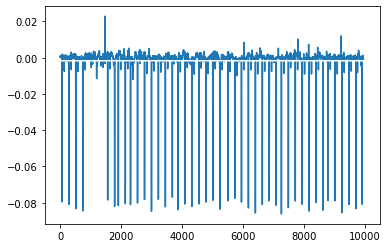

In [374]:
SARIMA_model.plot_diagnostics(figsize=(30,12))
plt.show()

#plot SARIMA
plt.plot(testData[:,4])
plt.plot(SARIMA_model.predict(n_periods=10000), color='white')
plt.show()

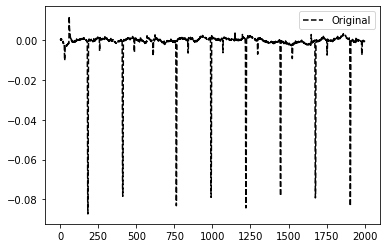

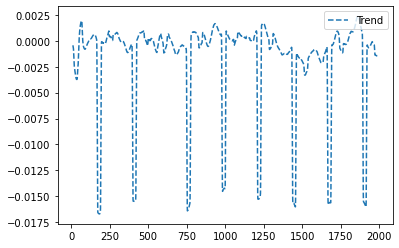

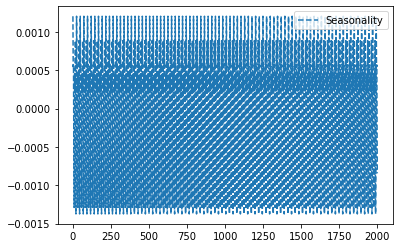

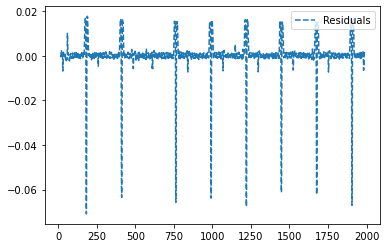

In [307]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(usableData[:2000,4],model='additive', period=24)
plt.plot(result.observed,'k',linestyle='dashed',label='Original')
plt.legend(loc='upper right')
plt.show()
plt.plot(result.trend,linestyle='dashed', label='Trend')
plt.legend(loc='upper right')
plt.show()
plt.plot(result.seasonal,linestyle='dashed', label='Seasonality')
plt.legend(loc='upper right')
plt.show()
plt.plot(result.resid,linestyle='dashed',label='Residuals')
plt.legend(loc='upper right')
plt.show()
hdul.close()

In [ ]:
#Determine rolling statistics
usableData[:,4].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
usableData[:,4].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(df["#Passengers"], color='#379BDB', label='Original')
plt.plot(df["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(df["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## Autoregressive (AR)

['TIME', 'TIMECORR', 'CADENCENO', 'PHASE', 'LC_INIT', 'LC_INIT_ERR', 'LC_WHITE', 'LC_DETREND', 'MODEL_INIT', 'MODEL_WHITE']


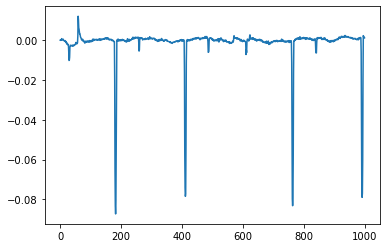

ADF Statistic: -6.438599
P-value: 1.629267229553875e-08
Critical Values:  {'1%': -3.4370266558635914, '5%': -2.864487711945291, '10%': -2.5683395116993872}


In [304]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

print(data.columns.names)
d_train = trainData[:,4]
d_test = testData[:,4]

plt.plot(d_train)
plt.show()
d_stationarityTest = adfuller(d_train, autolag='AIC')
adf, pvalue, usedlag, nobs, critical_values, icbest = d_stationarityTest

print('ADF Statistic: %f' % adf)
print("P-value: %s" % pvalue)
print("Critical Values: ", critical_values)


## ADF conclusion

Augmented Dickey-Fuller

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary

/Users/zekarim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


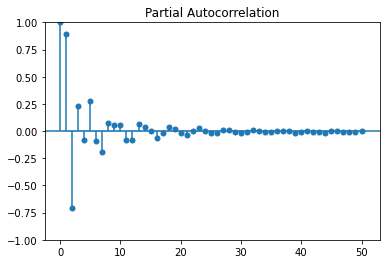

In [303]:
# plot pacf
from statsmodels.graphics.tsaplots import plot_pacf


plot_pacf(d_train, lags=50)
plt.show()

## PACF

Looking at the PACF, we could use 2 or 7.

Lets try both :

## Model with AR(2)

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                44813
Model:                     AutoReg(2)   Log Likelihood              192144.521
Method:               Conditional MLE   S.D. of innovations              0.003
Date:                Wed, 30 Nov 2022   AIC                        -384281.042
Time:                        16:28:46   BIC                        -384246.201
Sample:                             2   HQIC                       -384270.072
                                44813                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003   1.59e-05    -17.971      0.000      -0.000      -0.000
y.L1           1.5286      0.003    455.257      0.000       1.522       1.535
y.L2          -0.7034      0.003   -209.494      0.0

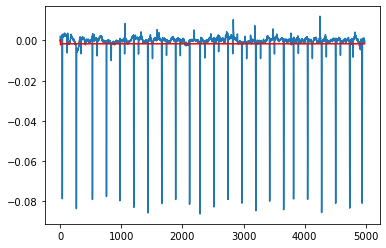

In [295]:
#train model AR(2)
model = AutoReg(d, lags=2).fit()
print(model.summary())

# make predictions
predictions = model.predict(start=len(d), end=len(d)+len(testData)-1, dynamic=False)

# plot results
plt.plot(testData[:,4])
plt.plot(predictions, color='red')
plt.show()


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                44813
Model:                     AutoReg(8)   Log Likelihood              196337.079
Method:               Conditional MLE   S.D. of innovations              0.003
Date:                Wed, 30 Nov 2022   AIC                        -392654.159
Time:                        16:28:46   BIC                        -392567.058
Sample:                             8   HQIC                       -392626.735
                                44813                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002   1.47e-05    -14.277      0.000      -0.000      -0.000
y.L1           1.7524      0.005    371.877      0.000       1.743       1.762
y.L2          -1.2281      0.009   -130.500      0.0

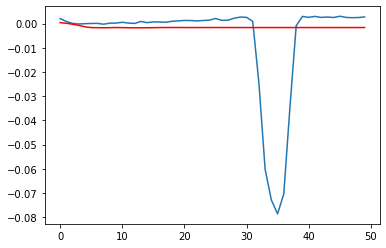

In [296]:
#train model AR(8)
model = AutoReg(d, lags=8).fit()
print(model.summary())

# make predictions
predictions = model.predict(start=len(d), end=len(d)+len(testData)-1, dynamic=False)

print(predictions)
print(testData[:,4])

# plot results
plt.plot(testData[:50,4])
plt.plot(predictions[:50], color='red')
plt.show()


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                44813
Model:                 ARIMA(1, 0, 0)   Log Likelihood              176854.238
Date:                Wed, 30 Nov 2022   AIC                        -353702.477
Time:                        16:28:53   BIC                        -353676.346
Sample:                             0   HQIC                       -353694.250
                              - 44813                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.000     -3.379      0.001      -0.003      -0.001
ar.L1          0.8974      0.001    828.180      0.000       0.895       0.900
sigma2      2.186e-05   3.56e-08    613.286      0.0

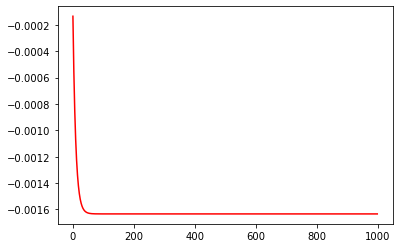

In [297]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

model = ARIMA(d, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

# make predictions

predictions = model_fit.predict(start=len(d), end=len(d)+len(testData)-1, dynamic=False)

# plot results
plt.plot(predictions[:1000], color='red')
plt.show()

Coefficients: [-2.09449381e-04  1.74421170e+00 -1.18086852e+00  5.72724736e-01
 -5.35527468e-01  1.65184704e-01  3.99122265e-01 -3.15502279e-01
  3.40417965e-03 -8.51326986e-02  1.11934546e-01  1.51203644e-01
 -1.94046298e-01 -1.55226338e-03 -4.96351096e-03  9.40970936e-02
  1.08422712e-02 -9.46864209e-02  4.30578119e-03  2.70470555e-02
  3.97649948e-02 -1.96857707e-02 -4.64694546e-02  2.09402468e-02
  1.45617716e-02  1.07374990e-02 -1.96892418e-02 -1.54972277e-02
  2.47501651e-02 -9.40771111e-03]
predicted=0.000573, expected=0.002082
predicted=0.000381, expected=0.000863
predicted=-0.000144, expected=0.000079
predicted=-0.000765, expected=-0.000175
predicted=-0.001379, expected=-0.000040
predicted=-0.001672, expected=0.000055
predicted=-0.001733, expected=0.000086
predicted=-0.001729, expected=-0.000253
predicted=-0.001715, expected=0.000185
predicted=-0.001711, expected=0.000212
predicted=-0.001718, expected=0.000530
predicted=-0.001722, expected=0.000213
predicted=-0.001709, expecte

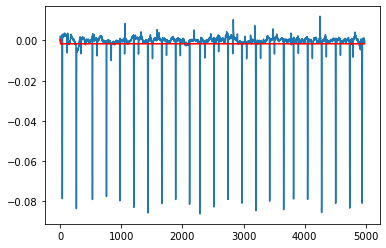

In [298]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# train autoregression
model = AutoReg(trainData[:,4], lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(trainData[:,4]), end=len(trainData[:,4])+len(testData[:,4])-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], testData[i,4]))
rmse = sqrt(mean_squared_error(testData[:,4], predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(testData[:,4])
plt.plot(predictions, color='red')
plt.show()

## Moving Average

## Single exponential smoothing

In [299]:
from statsmodels.tsa.api import SimpleExpSmoothing

def mse(observations,estimates):
    return np.square(np.subtract(observations,estimates)).mean()

single = SimpleExpSmoothing(d_train).fit(optimized=True)
single_preds = single.forecast(len(d_test))
single_mse = mse(d_test, single_preds)
print("Predictions: ", single_preds)
print("MSE: ", single_mse)

Predictions:  [3.58282764e-05 3.58282764e-05 3.58282764e-05 ... 3.58282764e-05
 3.58282764e-05 3.58282764e-05]
MSE:  0.00011732200911571678


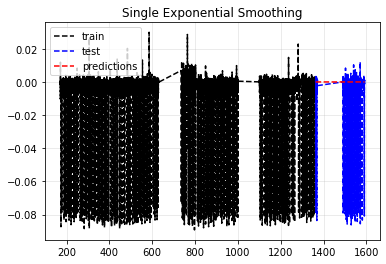

In [300]:
plt.plot(trainData[:,0], d_train, 'k--', label="train")
plt.plot(testData[:,0], d_test, color='blue', linestyle="--", label="test")
plt.plot(testData[:,0], single_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Single Exponential Smoothing")
plt.grid(alpha=0.3);

## ETS MODEL

In [306]:
#Create ETS model
from statsmodels.tsa.api import ETSModel

ets = ETSModel(d_train, error='mul', trend='add', seasonal='mul', seasonal_periods=24).fit()


ValueError: endog must be strictly positive when using multiplicative error, trend or seasonal components.